In [58]:
df_hitter_perf = pd.read_csv('./data/hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('./data/hitter_etc.csv', index_col=0)

In [59]:
df_hitter_perf.columns, df_hitter_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'년도', u'AVG_A',
        u'OBP_A', u'SLG_A', u'WAR_A', u'HR%_A', u'BB%_A', u'K%_A', u'BIPA_A',
        u'Spd_A', u'PSN_A', u'wOBA_A', u'wRC_A', u'wRAA_A', u'AVG_B', u'OBP_B',
        u'SLG_B', u'WAR_B', u'HR%_B', u'BB%_B', u'K%_B', u'BIPA_B', u'Spd_B',
        u'PSN_B', u'wOBA_B', u'wRC_B', u'wRAA_B'],
       dtype='object'),
 Index([u'Name', u'Year', u'Spectators', u'TitleSponsors', u'Broadcasting',
        u'GDP', u'Clubs', u'FA_Pitcher', u'FA_Hitter', u'BirthYear', u'Age',
        u'Captain', u'NationalMember', u'Marriage', u'Surgery', u'Salary',
        u'Total', u'Period', u'Transfer', u'GoldenGlove', u'Rookie', u'AllStar',
        u'Interest', u'Inflation', u'Hometown', u'RewardPlayer',
        u'PreviousTeam', u'NewTeam', u'Position'],
       dtype='object'))

In [60]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfX_hitter_year = df_hitter_perf['연도']
dfX_hitter_year.columns = ['Year']
dfX_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc],axis=1)

dfy_hitter = df_hitter_etc['Period']
dfy_hitter.columns = ['Year']
dfy2_hitter = df_hitter_etc['Salary']
dfy2_hitter.columns  = ['Salary']

In [61]:
idx = dfy_hitter == '-'
dfy_hitter = dfy_hitter.drop(dfy_hitter.index[idx]).astype(float)
dfy2_hitter = dfy2_hitter.drop(dfy2_hitter.index[idx]).astype(float)
dfX_hitter = dfX_hitter.drop(dfX_hitter.index[idx]).astype(float)

In [62]:
df = pd.concat([dfy_hitter,dfy2_hitter], axis=1)

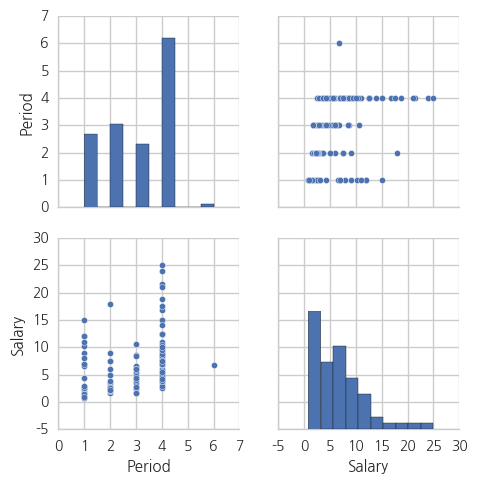

In [63]:
sns.pairplot(df)

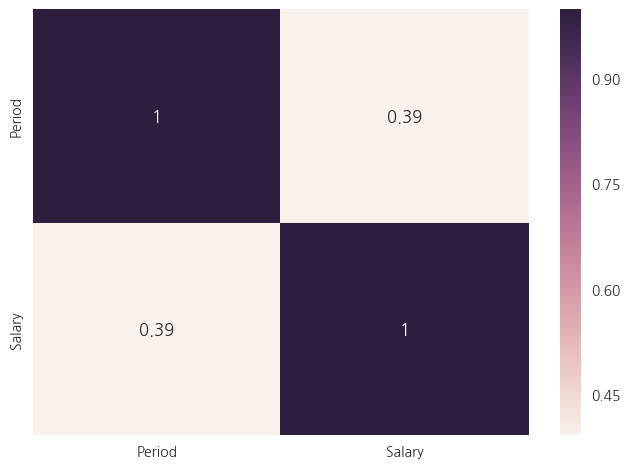

In [32]:
cormat = df.corr()
sns.heatmap(cormat, annot=True)

In [18]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# dfX_hitter = pd.DataFrame(scaler.fit_transform(dfX_hitter.ix[:,:-1]),columns=dfX_hitter.columns[:-1]).astype(float)
# dfX_hitter.index = np.arange(1,len(dfX_hitter)+1)
# dfy_hitter = pd.DataFrame(dfy_hitter)
# dfy_hitter.index = np.arange(1,len(dfy_hitter)+1)

In [19]:
df_hitter = pd.concat([dfX_hitter,dfy_hitter],axis=1)
df_hitter.head()

,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BB_A,K_A,BIPA_A,Spd_A,PSN_A,...,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Period
Index,,,,,,,,,,,,,,,,,,,,,
1,0.284,0.362,0.510,5.50,4.25,9.3,15.1,0.297,3.5,3.64,...,33.0,1.0,0.0,1.0,1.0,1.0,6.0,1.0,7.0,3.0
2,0.332,0.453,0.533,8.75,3.10,17.7,11.7,0.355,5.3,17.49,...,30.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,7.0,4.0
3,0.346,0.452,0.624,8.56,5.28,15.5,14.3,0.365,4.9,25.26,...,34.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,8.0,4.0
4,0.301,0.353,0.367,1.63,0.54,6.2,7.5,0.321,4.2,3.00,...,30.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
5,0.282,0.419,0.615,7.47,7.74,16.8,21.7,0.289,3.0,11.92,...,32.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,7.0,3.0


In [20]:
df_hitter1 = df_hitter.copy()

#df_hitter1["LogHR_A"]= np.log(df_hitter1["HR_A"]+1)
df_hitter1["LogBB_A"]= np.log(df_hitter1["BB_A"]+0)
df_hitter1["LogK_A"]= np.log(df_hitter1["K_A"]+0)
#df_hitter1["LogSpd_A"]= np.log(df_hitter1["Spd_A"]+0)
df_hitter1["LogPSN_A"]= np.log(df_hitter1["PSN_A"]+1)
df_hitter1["LogwRAA_A"]= np.log(df_hitter1["wRAA_A"]+15.6)   #  마이너스

df_hitter1["LogSLG_B"]= np.log(df_hitter1["SLG_B"]+0.804)
df_hitter1["LogWAR_B"]= np.log(df_hitter1["WAR_B"]+1.54)   # 마이너스 
df_hitter1["LogPSN_B"]= np.log(df_hitter1["PSN_B"]+1)    # 질문
df_hitter1["LogHR_B"]= np.log(df_hitter1["HR_B"]+ 1)
df_hitter1["LogK_B"]= np.log(df_hitter1["K_B"]+0)
df_hitter1["LogwRAA_B"]= np.log(df_hitter1["wRAA_B"]+70)   # 마이너스

df_hitter1["LogSpectators"]= np.log(df_hitter1["Spectators"]+0)   # etc 변수들 질문
df_hitter1["LogBroadcasting"]= np.log(df_hitter1["Broadcasting"]+0)
df_hitter1["LogGDP"]= np.log(df_hitter1["GDP"]+0)
#df_hitter1["LogGoldenGlove"]= np.log(df_hitter1["GoldenGlove"]+1)
df_hitter1["LogAllStar"]= np.log(df_hitter1["AllStar"]+1)

#df_hitter1["LogSalary"]= np.log(df_hitter1["Salary"]+ 1)

#del df_hitter1["HR_A"]
del df_hitter1["BB_A"]
del df_hitter1["K_A"]
#del df_hitter1["Spd_A"]
del df_hitter1["PSN_A"]
del df_hitter1["wRAA_A"]

del df_hitter1["SLG_B"]
del df_hitter1["WAR_B"]
del df_hitter1["HR_B"]
del df_hitter1["PSN_B"]
del df_hitter1["K_B"]
del df_hitter1["wRAA_B"]

del df_hitter1["Spectators"]
del df_hitter1["Broadcasting"]
del df_hitter1["GDP"]
#del df_hitter1["GoldenGlove"]
del df_hitter1["AllStar"]

In [21]:
cols = df_hitter1.columns.tolist()
cols = cols[:-15] + cols[-14:] + cols[-15:-14]
df_hitter1 = df_hitter1[cols]

In [22]:
df_hitter1 = sm.add_constant(df_hitter1)

In [23]:
df_hitter1.head()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BIPA_A,Spd_A,wOBA_A,wRC_A,...,LogWAR_B,LogPSN_B,LogHR_B,LogK_B,LogwRAA_B,LogSpectators,LogBroadcasting,LogGDP,LogAllStar,Period
Index,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.284,0.362,0.510,5.50,4.25,0.297,3.5,0.378,76.4,...,1.650580,1.057790,1.631199,2.468100,4.405499,14.985086,3.828641,13.265377,2.079442,3.0
2,1.0,0.332,0.453,0.533,8.75,3.10,0.355,5.3,0.442,112.4,...,1.401183,2.633327,1.585145,2.862201,4.345103,14.734816,3.912023,13.361672,2.079442,4.0
3,1.0,0.346,0.452,0.624,8.56,5.28,0.365,4.9,0.474,121.4,...,1.717395,2.633327,1.291984,2.341806,4.680278,14.911140,4.382027,13.441784,2.197225,4.0
4,1.0,0.301,0.353,0.367,1.63,0.54,0.321,4.2,0.331,43.0,...,1.153732,1.386294,0.431782,2.014903,4.157319,14.911140,4.382027,13.441784,0.000000,4.0
5,1.0,0.282,0.419,0.615,7.47,7.74,0.289,3.0,0.432,107.7,...,1.269761,2.314514,1.752672,3.299534,4.139955,14.688714,4.422809,13.543622,2.079442,3.0


In [24]:
model = sm.OLS(df_hitter1.ix[:,-1],df_hitter1.ix[:,:-1])
result = model.fit()

sns.pairplot(df_hitter1.ix[:,:14])
plt.show()

sns.pairplot(df_hitter1.ix[:,14:27])
plt.show()

sns.pairplot(df_hitter1.ix[:,27:-1])
plt.show()

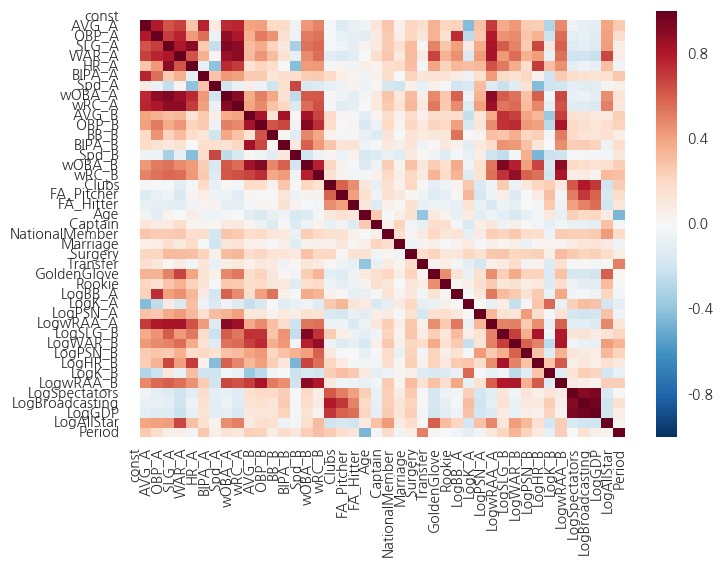

In [27]:
cormat = df_hitter1.corr()
sns.heatmap(cormat)
plt.show()

In [26]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Period   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     4.717
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           1.38e-09
Time:                        05:07:24   Log-Likelihood:                -122.19
No. Observations:                 123   AIC:                             328.4
Df Residuals:                      81   BIC:                             446.5
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              77.2335     24.839     

In [33]:
df_hitter2 = df_hitter1.copy()

del df_hitter2["LogSpectators"]
del df_hitter2['LogBroadcasting']
del df_hitter2['Clubs']
del df_hitter2['LogAllStar']
#del df_hitter2['GoldenGlove']
del df_hitter2['Captain']
del df_hitter2['Marriage']
del df_hitter2['Rookie']
del df_hitter2['Surgery']
#del df_hitter2['Transfer']
#del df_hitter2['LogGDP']
del df_hitter2['FA_Pitcher']
del df_hitter2['FA_Hitter']
#del df_hitter2['NationalMember']

del df_hitter2['LogwRAA_B']
del df_hitter2['wOBA_B']
del df_hitter2['wRC_B']
del df_hitter2['AVG_B']
del df_hitter2['LogSLG_B']
del df_hitter2['OBP_B']
del df_hitter2['Spd_B']
del df_hitter2['LogPSN_B']
del df_hitter2['LogK_B']
del df_hitter2['BIPA_B']
del df_hitter2['BB_B']
del df_hitter2['LogHR_B']
               
del df_hitter2['LogwRAA_A']
del df_hitter2['wOBA_A']
del df_hitter2['wRC_A']
del df_hitter2['AVG_A']
del df_hitter2['OBP_A']
del df_hitter2['SLG_A']
del df_hitter2['HR_A']
del df_hitter2['LogK_A']
del df_hitter2['LogBB_A']
del df_hitter2['Spd_A']
del df_hitter2['BIPA_A']
del df_hitter2['LogPSN_A']
del df_hitter2['WAR_A']

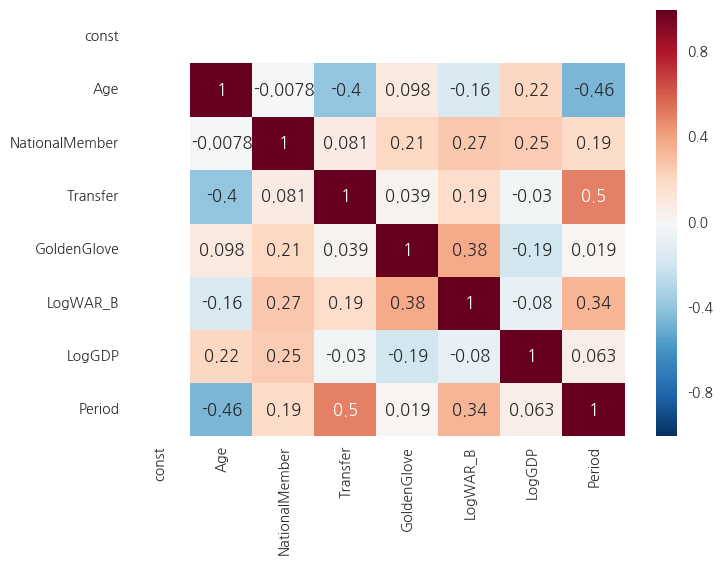

In [34]:
cormat2 = df_hitter2.corr()
sns.heatmap(cormat2, annot=True)
plt.show()

In [36]:
model2 = sm.OLS(df_hitter2.ix[:,-1],df_hitter2.ix[:,:-1])
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Period   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     13.48
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           1.47e-11
Time:                        05:43:46   Log-Likelihood:                -164.69
No. Observations:                 123   AIC:                             343.4
Df Residuals:                     116   BIC:                             363.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4020      4.692     -0.

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

dfX_hitter = pd.DataFrame(scaler.fit_transform(dfX_hitter.ix[:,:]),columns=dfX_hitter.columns[:]).astype(float)

In [65]:
dfy_hitter = df_hitter_etc['Period']
#dfy_hitter = dfy_hitter[0:125]
idx = dfy_hitter == '-'


In [66]:
dfX_hitter.index = np.arange(1,len(dfX_hitter)+1)

In [67]:

dfy_hitter = dfy_hitter.drop(dfy_hitter.index[idx])

In [68]:
dfX_hitter.index = np.arange(1,len(dfX_hitter)+1)
dfy_hitter.index = np.arange(1,len(dfy_hitter)+1)
dfy_hitter.columns =['period']

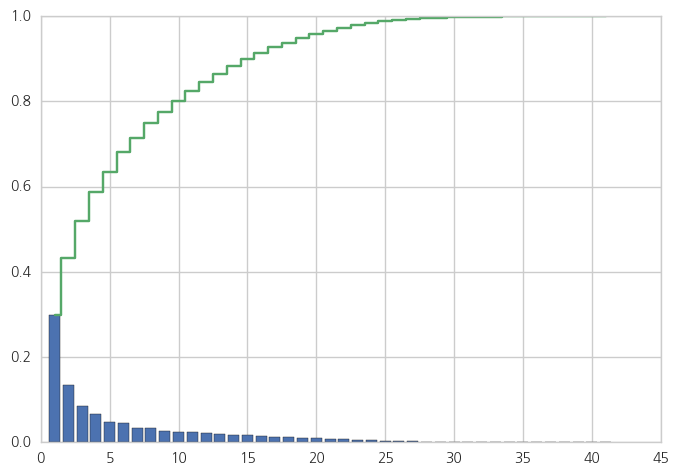

In [72]:
from sklearn.decomposition import PCA

pca = PCA().fit(dfX_hitter)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align='center', color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where='mid', color=cmap[1])
plt.show()

In [73]:
X_pca = PCA(n_components=10)

dfX_pca = pd.DataFrame(X_pca.fit_transform(dfX_hitter))
dfy_pca = np.log(dfy_hitter.astype(float))

dfX_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
dfX_pca.index = np.arange(1,len(dfX_pca)+1)
dfy_pca.index = np.arange(1,len(dfy_hitter)+1)

PCA_data = pd.concat([dfX_pca, dfy_pca],axis=1)
PCA_data.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','Salary']

In [74]:
df_PCA = pd.DataFrame(X_pca.components_,columns=dfX_hitter.columns,index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [75]:
regression = 'Salary ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10'
model1 = sm.OLS.from_formula(regression, data=PCA_data)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     6.030
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           2.80e-07
Time:                        05:54:41   Log-Likelihood:                -68.401
No. Observations:                 123   AIC:                             158.8
Df Residuals:                     112   BIC:                             189.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9371      0.040     23.502      0.0